### <b> Constructing Dataframe for Biometric Data - 2nd Iteration </b>

#### <b> [PLANNING] </b>

The goal of this <b> 2nd iteration </b> is to construct a dataset with 45 entries, corresponding to the 45 lettuce plants in the study. <p></p>

For each each entry/plant the <b> input </b> and <b> output/target </b> variables will be: <p></p>

<b> [INPUT VARS] </b>

* <b> Growing Degree Days </b>: Measure of heat accumulation used to predict plant development 
* <b> Average Humidity (Avg. Humidity) </b>: The average humidity the plant was exposed to inside the greenhouse as captured by the sensors during the period of the experiment, expressed in percentage (%).
* <b> Accumulated Radiation (Acc. R) </b>: The total amount of PAR (Photosynthetically active radiation) the plant was exposed to during the period of the experiment, expressed in micromoles per second ($\mu$/m^2/s)
* <b> Accumulated Irrigation (Acc. I) </b>: The total amount of the aquous solution the plant was irrigated with during the period of the experiment, expressed in miliLiters (mL)
* <b> Accumulated Nitrates (Acc. N) </b>: The total amount of nitrates the plant was fed during the period of the experiment (calculated as a fraction of the aquous solution), expressed in milimoles (milimoles)


<b> [OUTPUT/TARGET VARS *(1)] </b>


* <b> Diameter </b>: The diameter of a chosen leaf of the plant at the time of harvest, expressed in centimeters (cm)
* <b> Perpendicular </b>: The length of perpendicular line to the chosen diameter of a chosen leaf at the time of harvest, expressed in centimeters (cm)
* <b> Weight </b>: The weight of the plant at the time of harvest, expressed in kilograms (Kg)
* <b> Height </b>: The height of the plant at the time of harvest, expressed in centimeters (cm)
* <b> Thickness </b>: Leaf thickness at the time of harvest, expressed in centimeters (cm)
* <b> Number of leaves (N leaves) </b>: The number of leaves the plant presents at the time of harvest

*(1): Each target variable will be predicted at a time




* T_base = 6ºC (GDD)
* Treshold de radiação PAR planta?
* Peso gerado através do consumo de água (output var -> future work/interessante para perceber eficiência da planta)
* sol A: 6 mil_moles azoto/L
* sol B: 13 mil_moles azoto/L
* sol C: 17 mil_moles azoto/L
* avg diameter + perpendicular para var output
* leaf thickness 
* análise nutricionais (valor finais de azoto por grupo)
* escala bbch
* leaf only fresh weight (valores excel em gramas)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### <b> Load previous iteration of final dataset (withoud encoding) </b>

In [14]:
biometry = pd.read_csv("../../data/final_biometric_data.csv")

In [15]:
biometry

,Unnamed: 0,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,Max. Temp.,...,Mean. Temp.,Max. Hum.,Min. Hum.,Mean. Hum.,Combined Temperature Average,Combined Temperature Std Dev,Combined Humidity Average,Combined Humidity Std Dev,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,W,RWGRB5,10,14.5,10.4,9.50,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
1,2024-09-07,2,1,W,RWGRA3,10,10.9,9.7,9.80,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
2,2024-09-07,3,1,W,RWGRC1,13,15.8,13.9,9.40,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
4,2024-09-07,5,1,W,RWGRB3,11,14.2,10.5,12.50,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,N,RNROA3,11,26.8,24.5,10.15,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3250
356,2024-10-03,42,6,N,RNROB5,7,30.1,22.6,11.85,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3200
357,2024-10-03,43,6,N,RNROA2,11,22.8,20.5,10.35,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3650
358,2024-10-03,44,6,N,RNROC4,10,30.5,26.2,11.55,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3500


In [16]:
biometry.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
biometry.drop(columns=['Max. Temp.', 'Min. Temp.', 'Mean. Temp.',
       'Max. Hum.', 'Min. Hum.', 'Mean. Hum.', 'Combined Temperature Average',
       'Combined Temperature Std Dev', 'Combined Humidity Average',
       'Combined Humidity Std Dev',], inplace=True)

In [17]:
biometry['Date'].to_timestamp

<bound method Series.to_timestamp of 0      2024-09-07
1      2024-09-07
2      2024-09-07
3      2024-09-07
4      2024-09-07
          ...    
355    2024-10-03
356    2024-10-03
357    2024-10-03
358    2024-10-03
359    2024-10-03
Name: Date, Length: 360, dtype: object>

In [19]:
biometry

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,W,RWGRB5,10,14.5,10.4,9.50,19,0.0000
1,2024-09-07,2,1,W,RWGRA3,10,10.9,9.7,9.80,19,0.0000
2,2024-09-07,3,1,W,RWGRC1,13,15.8,13.9,9.40,19,0.0000
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,19,0.0000
4,2024-09-07,5,1,W,RWGRB3,11,14.2,10.5,12.50,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,N,RNROA3,11,26.8,24.5,10.15,19,0.3250
356,2024-10-03,42,6,N,RNROB5,7,30.1,22.6,11.85,19,0.3200
357,2024-10-03,43,6,N,RNROA2,11,22.8,20.5,10.35,19,0.3650
358,2024-10-03,44,6,N,RNROC4,10,30.5,26.2,11.55,19,0.3500


In [8]:
biometry['Date'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [7]:
biometry

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,W,RWGRB5,10,14.5,10.4,9.50,19,0.0000
1,2024-09-07,2,1,W,RWGRA3,10,10.9,9.7,9.80,19,0.0000
2,2024-09-07,3,1,W,RWGRC1,13,15.8,13.9,9.40,19,0.0000
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,19,0.0000
4,2024-09-07,5,1,W,RWGRB3,11,14.2,10.5,12.50,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,N,RNROA3,11,26.8,24.5,10.15,19,0.3250
356,2024-10-03,42,6,N,RNROB5,7,30.1,22.6,11.85,19,0.3200
357,2024-10-03,43,6,N,RNROA2,11,22.8,20.5,10.35,19,0.3650
358,2024-10-03,44,6,N,RNROC4,10,30.5,26.2,11.55,19,0.3500


In [11]:
plant_dict = {}
for plant in biometry['CODE'].unique():    
    plant_dict[plant] = biometry[biometry['CODE'] == plant]


In [16]:
plant_dict.keys()

dict_keys(['RWGRB5', 'RWGRA3', 'RWGRC1', 'RWGRA2', 'RWGRB3', 'RWGRA4', 'RWGRC3', 'RWGRA5', 'RWGRC2', 'RWGRB4', 'RWGRC5', 'RWGRB1', 'RWGRC4', 'RWGRB2', 'RWGRA1', 'RNGRA3', 'RNGRB5', 'RNGRC4', 'RNGRA1', 'RNGRC5', 'RNGRB2', 'RNGRA2', 'RNROB2', 'RNROC3', 'RNROA5', 'RNROC5', 'RNROB3', 'RNROA1', 'RNROC1', 'RNGRC1', 'RNGRB3', 'RNGRA5', 'RNGRB1', 'RNGRC3', 'RNGRB4', 'RNGRA4', 'RNGRC2', 'RNROB1', 'RNROA4', 'RNROC2', 'RNROA3', 'RNROB5', 'RNROA2', 'RNROC4', 'RNROB4'])

In [18]:
plant_dict['RWGRA2']

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,19,0.000000
48,2024-09-11,4,1,W,RWGRA2,10,12.4,12.3,10.80,19,0.000000
93,2024-09-14,4,1,W,RWGRA2,14,16.2,16.5,10.20,39,0.000000
138,2024-09-17,4,1,W,RWGRA2,13,17.2,15.5,11.10,19,0.000000
183,2024-09-20,4,1,W,RWGRA2,13,18.7,18.1,8.15,19,0.390000
228,2024-09-24,4,1,W,RWGRA2,13,22.9,22.8,10.15,19,0.320000
273,2024-09-29,4,1,W,RWGRA2,11,22.9,20.6,9.55,19,0.336667
318,2024-10-03,4,1,W,RWGRA2,15,24.8,23.6,11.55,17,0.290000


In [6]:
biometry['Date'].dtype

dtype('O')

In [7]:
biometry

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,W,RWGRB5,10,14.5,10.4,9.50,19,0.0000
1,2024-09-07,2,1,W,RWGRA3,10,10.9,9.7,9.80,19,0.0000
2,2024-09-07,3,1,W,RWGRC1,13,15.8,13.9,9.40,19,0.0000
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,19,0.0000
4,2024-09-07,5,1,W,RWGRB3,11,14.2,10.5,12.50,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,N,RNROA3,11,26.8,24.5,10.15,19,0.3250
356,2024-10-03,42,6,N,RNROB5,7,30.1,22.6,11.85,19,0.3200
357,2024-10-03,43,6,N,RNROA2,11,22.8,20.5,10.35,19,0.3650
358,2024-10-03,44,6,N,RNROC4,10,30.5,26.2,11.55,19,0.3500


#### <b> Biometry at Harvest </b>

* Create auxiliary dataframe for biometry at the time of harvest <b> (harvest date: 2024-10-03) </b>

In [8]:
harvest_biometry = pd.DataFrame(biometry.loc[biometry["Date"] == "2024-10-03"]).reset_index()

In [9]:
harvest_biometry.columns

Index(['index', 'Date', 'Number', 'Line', 'Sample', 'CODE', 'No leaves',
       'Diameter', 'Perpendicular', 'Height', 'BBCH',
       'Average Leaf Thickness'],
      dtype='object')

In [10]:
harvest_biometry

,index,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,315,2024-10-03,1,1,W,RWGRB5,16,28.5,26.4,11.55,19,0.2300
1,316,2024-10-03,2,1,W,RWGRA3,14,23.5,24.2,11.15,19,0.2975
2,317,2024-10-03,3,1,W,RWGRC1,16,23.6,21.7,8.55,19,0.3520
3,318,2024-10-03,4,1,W,RWGRA2,15,24.8,23.6,11.55,17,0.2900
4,319,2024-10-03,5,1,W,RWGRB3,12,23.5,20.4,9.05,19,0.2950
5,320,2024-10-03,6,1,W,RWGRA4,10,24.5,18.4,8.85,15,0.3200
6,321,2024-10-03,7,1,W,RWGRC3,16,23.6,23.8,8.55,18,0.3350
7,322,2024-10-03,8,1,W,RWGRA5,15,24.8,26.2,10.25,19,0.2700
8,323,2024-10-03,9,2,W,RWGRC2,12,28.6,27.4,13.75,19,0.3100
9,324,2024-10-03,10,2,W,RWGRB4,15,33.1,29.6,13.25,19,0.3350


In [11]:
harvest_biometry.size

540

In [12]:
harvest_biometry

,index,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,315,2024-10-03,1,1,W,RWGRB5,16,28.5,26.4,11.55,19,0.2300
1,316,2024-10-03,2,1,W,RWGRA3,14,23.5,24.2,11.15,19,0.2975
2,317,2024-10-03,3,1,W,RWGRC1,16,23.6,21.7,8.55,19,0.3520
3,318,2024-10-03,4,1,W,RWGRA2,15,24.8,23.6,11.55,17,0.2900
4,319,2024-10-03,5,1,W,RWGRB3,12,23.5,20.4,9.05,19,0.2950
5,320,2024-10-03,6,1,W,RWGRA4,10,24.5,18.4,8.85,15,0.3200
6,321,2024-10-03,7,1,W,RWGRC3,16,23.6,23.8,8.55,18,0.3350
7,322,2024-10-03,8,1,W,RWGRA5,15,24.8,26.2,10.25,19,0.2700
8,323,2024-10-03,9,2,W,RWGRC2,12,28.6,27.4,13.75,19,0.3100
9,324,2024-10-03,10,2,W,RWGRB4,15,33.1,29.6,13.25,19,0.3350


#### <b> Accumulated Irrigation </b>

In [27]:
irrigation = pd.read_excel("../../raw_data/irrigation.xlsx")

In [30]:
irrigation[irrigation['Sample'] == 'rngra1']

,Date,Sample,Quantity (mL)
0,2024-08-24,rngra1,50.00
45,2024-08-26,rngra1,50.00
90,2024-08-28,rngra1,50.00
135,2024-08-30,rngra1,50.00
180,2024-09-02,rngra1,50.00
225,2024-09-04,rngra1,50.00
270,2024-09-07,rngra1,50.00
315,2024-09-09,rngra1,50.00
360,2024-09-11,rngra1,66.00
405,2024-09-12,rngra1,62.25


In [15]:
# Convert Sample column values to Upper case to match biometry dataset
irrigation["Sample"] = irrigation["Sample"].str.upper()

In [16]:
# Group By Sample and add up daily irrigation
accumulated_irrigation = irrigation.groupby('Sample')['Quantity (mL)'].sum()

In [17]:
# Set to dataframe to simplify joining
accumulated_irrigation = pd.DataFrame(accumulated_irrigation)
accumulated_irrigation.reset_index(inplace=True)

In [18]:
# Rename 'Sample' column to 'CODE'
accumulated_irrigation.rename(columns={'Sample':'CODE'}, inplace=True)

In [19]:
accumulated_irrigation

,CODE,Quantity (mL)
0,RNGRA1,1172.25
1,RNGRA2,1127.25
2,RNGRA3,1141.00
3,RNGRA4,966.25
4,RNGRA5,989.50
5,RNGRB1,970.25
6,RNGRB2,1331.00
7,RNGRB3,1114.75
8,RNGRB4,1005.50
9,RNGRB5,1240.00


<b> Accumulated Irrigation column to add to dataset </b>

In [20]:
accumulated_irrigation

,CODE,Quantity (mL)
0,RNGRA1,1172.25
1,RNGRA2,1127.25
2,RNGRA3,1141.00
3,RNGRA4,966.25
4,RNGRA5,989.50
5,RNGRB1,970.25
6,RNGRB2,1331.00
7,RNGRB3,1114.75
8,RNGRB4,1005.50
9,RNGRB5,1240.00


#### <b> Accumulated Nitrates </b>

Each plant sample belongs to either group A, B or C, depending or not if letter is displayed in its <i> Sample </i> name.
E.g.:

* RNGRA5 belongs to group A
* RNGRB1 belongs to group B
* RNGRC1  belongs to group C

Depending on the group the plant belongs to, it was irrigated with a aqueous solution with different concentrations of Nitrate.

* Group A solution's concentatrion: 6 mili_moles nitrates/L
* Group B solution's concentatrion: 13 mili_moles nitrates/L
* Group C solution's concentatrion: 17 mili_moles nitrates/L

The total amount of nitrates fed to the plant up until the harvest will be calculated based on the Daily Irrigation of the plant with the aqueous solution (volume) and the Concentrantrion of solution depending on which group the plants belong to (A, B or C), which will be added:

* $ Nitrates (mmol) = C (mmol/L) * V (L) $ (daily quantity for each sample)

This quantity will then be added up for each day resulting in the total amount of nitrates for each plant

In [21]:
irrigation

,Date,Sample,Quantity (mL)
0,2024-08-24,RNGRA1,50.0
1,2024-08-24,RNGRA2,50.0
2,2024-08-24,RNGRA3,50.0
3,2024-08-24,RNGRA4,50.0
4,2024-08-24,RNGRA5,50.0
...,...,...,...
985,2024-10-01,RWGRC1,7.5
986,2024-10-01,RWGRC2,14.5
987,2024-10-01,RWGRC3,5.0
988,2024-10-01,RWGRC4,12.0


In [22]:
irrigation["Quantity (L)"] = irrigation["Quantity (mL)"] / 1000

In [23]:
irrigation

,Date,Sample,Quantity (mL),Quantity (L)
0,2024-08-24,RNGRA1,50.0,0.0500
1,2024-08-24,RNGRA2,50.0,0.0500
2,2024-08-24,RNGRA3,50.0,0.0500
3,2024-08-24,RNGRA4,50.0,0.0500
4,2024-08-24,RNGRA5,50.0,0.0500
...,...,...,...,...
985,2024-10-01,RWGRC1,7.5,0.0075
986,2024-10-01,RWGRC2,14.5,0.0145
987,2024-10-01,RWGRC3,5.0,0.0050
988,2024-10-01,RWGRC4,12.0,0.0120


In [24]:
# Create new column Concentration and add the values defined above
irrigation.loc[irrigation["Sample"].str.contains('A'), 'Concentration'] = 6
irrigation.loc[irrigation["Sample"].str.contains('B'), 'Concentration'] = 13
irrigation.loc[irrigation["Sample"].str.contains('C'), 'Concentration'] = 17

In [25]:
irrigation

,Date,Sample,Quantity (mL),Quantity (L),Concentration
0,2024-08-24,RNGRA1,50.0,0.0500,6.0
1,2024-08-24,RNGRA2,50.0,0.0500,6.0
2,2024-08-24,RNGRA3,50.0,0.0500,6.0
3,2024-08-24,RNGRA4,50.0,0.0500,6.0
4,2024-08-24,RNGRA5,50.0,0.0500,6.0
...,...,...,...,...,...
985,2024-10-01,RWGRC1,7.5,0.0075,17.0
986,2024-10-01,RWGRC2,14.5,0.0145,17.0
987,2024-10-01,RWGRC3,5.0,0.0050,17.0
988,2024-10-01,RWGRC4,12.0,0.0120,17.0


In [26]:
irrigation["Quantity (milimoles)"] = irrigation["Quantity (L)"] * irrigation["Concentration"]

In [27]:
irrigation

,Date,Sample,Quantity (mL),Quantity (L),Concentration,Quantity (milimoles)
0,2024-08-24,RNGRA1,50.0,0.0500,6.0,0.3000
1,2024-08-24,RNGRA2,50.0,0.0500,6.0,0.3000
2,2024-08-24,RNGRA3,50.0,0.0500,6.0,0.3000
3,2024-08-24,RNGRA4,50.0,0.0500,6.0,0.3000
4,2024-08-24,RNGRA5,50.0,0.0500,6.0,0.3000
...,...,...,...,...,...,...
985,2024-10-01,RWGRC1,7.5,0.0075,17.0,0.1275
986,2024-10-01,RWGRC2,14.5,0.0145,17.0,0.2465
987,2024-10-01,RWGRC3,5.0,0.0050,17.0,0.0850
988,2024-10-01,RWGRC4,12.0,0.0120,17.0,0.2040


In [28]:
nitrates = irrigation.groupby("Sample")["Quantity (milimoles)"].sum()

<b> Nitrates quantity column to add to dataset </b>

In [29]:
# nitrates = pd.DataFrame(nitrates).reset_index(inplace=True)

In [30]:
nitrates_df = pd.DataFrame(nitrates).reset_index()

In [31]:
nitrates_df.rename(columns={'Sample':'CODE'}, inplace=True)

In [32]:
nitrates_df

,CODE,Quantity (milimoles)
0,RNGRA1,7.03350
1,RNGRA2,6.76350
2,RNGRA3,6.84600
3,RNGRA4,5.79750
4,RNGRA5,5.93700
5,RNGRB1,12.61325
6,RNGRB2,17.30300
7,RNGRB3,14.49175
8,RNGRB4,13.07150
9,RNGRB5,16.12000


#### <b> Growing Degree Days </b>

* $ \text{GDD} = \frac {T_{\text{max}} + T_{\text{min}}}{2} - T_{\text{base}} $

    * $T_{\text{baseLettuce}} =$ 4.5 C

In [33]:
tbase = 4.5

In [31]:
temperature = pd.read_excel("../../raw_data/inside_2.xlsx")[['date','temperature']]

In [36]:
temperature[temperature['date'] == '2024-08-22']

,date,temperature
0,2024-08-22,18.2
1,2024-08-22,17.2
2,2024-08-22,17.3
3,2024-08-22,17.7
4,2024-08-22,17.4
5,2024-08-22,17.3
6,2024-08-22,17.8
7,2024-08-22,17.4
8,2024-08-22,17.8
9,2024-08-22,19.3


In [37]:
len(temperature[temperature['date'] == '2024-08-22'])

25

In [35]:
temperature['date'].unique()

<DatetimeArray>
['2024-08-22 00:00:00', '2024-08-23 00:00:00', '2024-08-24 00:00:00',
 '2024-08-25 00:00:00', '2024-08-26 00:00:00', '2024-08-27 00:00:00',
 '2024-08-28 00:00:00', '2024-08-29 00:00:00', '2024-08-30 00:00:00',
 '2024-08-31 00:00:00', '2024-09-01 00:00:00', '2024-09-02 00:00:00',
 '2024-09-03 00:00:00', '2024-09-04 00:00:00', '2024-09-05 00:00:00',
 '2024-09-06 00:00:00', '2024-09-07 00:00:00', '2024-09-08 00:00:00',
 '2024-09-09 00:00:00', '2024-09-10 00:00:00', '2024-09-11 00:00:00',
 '2024-09-12 00:00:00', '2024-09-13 00:00:00', '2024-09-14 00:00:00',
 '2024-09-15 00:00:00', '2024-09-16 00:00:00', '2024-09-17 00:00:00',
 '2024-09-18 00:00:00', '2024-09-19 00:00:00', '2024-09-20 00:00:00',
 '2024-09-21 00:00:00', '2024-09-22 00:00:00', '2024-09-23 00:00:00',
 '2024-09-24 00:00:00', '2024-09-25 00:00:00', '2024-09-26 00:00:00',
 '2024-09-27 00:00:00', '2024-09-28 00:00:00', '2024-09-29 00:00:00',
 '2024-09-30 00:00:00', '2024-10-01 00:00:00', '2024-10-02 00:00:00',
 '20

In [34]:
len(temperature['date'].unique())

43

In [36]:
max_temps = temperature.groupby('date')['temperature'].max()
min_temps = temperature.groupby('date')['temperature'].min()

In [37]:
max_temps

date
2024-08-22    29.300000
2024-08-23    36.800000
2024-08-24    26.100000
2024-08-25    33.300000
2024-08-26    33.200000
2024-08-27    27.600000
2024-08-28    29.300000
2024-08-29    25.100000
2024-08-30    29.100000
2024-08-31    24.900000
2024-09-01    28.500000
2024-09-02    26.600000
2024-09-03    32.000000
2024-09-04    33.800000
2024-09-05    27.600000
2024-09-06    22.300000
2024-09-07    28.500000
2024-09-08    30.700000
2024-09-09    29.600000
2024-09-10    31.400000
2024-09-11    32.900000
2024-09-12    31.000000
2024-09-13    35.800000
2024-09-14    36.100000
2024-09-15    40.800000
2024-09-16    35.051395
2024-09-17    32.717896
2024-09-18    28.968933
2024-09-19    28.699770
2024-09-20    29.394903
2024-09-21    28.622517
2024-09-22    28.669960
2024-09-23    26.990297
2024-09-24    21.077497
2024-09-25    19.900457
2024-09-26    24.905272
2024-09-27    25.816721
2024-09-28    30.307077
2024-09-29    29.544327
2024-09-30    31.453028
2024-10-01    21.569218
2024-10-02 

In [38]:
min_temps

date
2024-08-22    17.200000
2024-08-23    18.400000
2024-08-24    18.800000
2024-08-25    16.700000
2024-08-26    17.700000
2024-08-27    18.100000
2024-08-28    16.600000
2024-08-29    19.100000
2024-08-30    17.700000
2024-08-31    18.600000
2024-09-01    18.700000
2024-09-02    17.700000
2024-09-03    14.800000
2024-09-04    16.900000
2024-09-05    16.900000
2024-09-06    13.800000
2024-09-07    15.400000
2024-09-08    13.900000
2024-09-09    15.400000
2024-09-10    15.100000
2024-09-11    16.400000
2024-09-12    17.400000
2024-09-13    18.800000
2024-09-14    18.600000
2024-09-15    17.500000
2024-09-16    22.300000
2024-09-17    23.187569
2024-09-18    20.650547
2024-09-19    18.498018
2024-09-20    20.033173
2024-09-21    18.590183
2024-09-22    19.238600
2024-09-23    18.253342
2024-09-24    17.494766
2024-09-25    18.420944
2024-09-26    18.499657
2024-09-27    15.134524
2024-09-28    13.076940
2024-09-29    14.878392
2024-09-30    15.681866
2024-10-01    19.475641
2024-10-02 

In [39]:
gdd = (max_temps + min_temps)/2 - tbase

In [40]:
gdd

date
2024-08-22    18.750000
2024-08-23    23.100000
2024-08-24    17.950000
2024-08-25    20.500000
2024-08-26    20.950000
2024-08-27    18.350000
2024-08-28    18.450000
2024-08-29    17.600000
2024-08-30    18.900000
2024-08-31    17.250000
2024-09-01    19.100000
2024-09-02    17.650000
2024-09-03    18.900000
2024-09-04    20.850000
2024-09-05    17.750000
2024-09-06    13.550000
2024-09-07    17.450000
2024-09-08    17.800000
2024-09-09    18.000000
2024-09-10    18.750000
2024-09-11    20.150000
2024-09-12    19.700000
2024-09-13    22.800000
2024-09-14    22.850000
2024-09-15    24.650000
2024-09-16    24.175697
2024-09-17    23.452733
2024-09-18    20.309740
2024-09-19    19.098894
2024-09-20    20.214038
2024-09-21    19.106350
2024-09-22    19.454280
2024-09-23    18.121820
2024-09-24    14.786131
2024-09-25    14.660700
2024-09-26    17.202464
2024-09-27    15.975623
2024-09-28    17.192009
2024-09-29    17.711360
2024-09-30    19.067447
2024-10-01    16.022430
2024-10-02 

In [41]:
# Add to harvestbiometry dataset
total_gdd = gdd.sum() 

#### <b> Average Humidity </b>

In [42]:
humidity = pd.read_excel("../../raw_data/inside_2.xlsx")[['date','humidity']]

In [43]:
humidity

,date,humidity
0,2024-08-22,66.100000
1,2024-08-22,70.700000
2,2024-08-22,74.000000
3,2024-08-22,76.600000
4,2024-08-22,77.800000
...,...,...
941,2024-10-03,86.559822
942,2024-10-03,85.557480
943,2024-10-03,84.059044
944,2024-10-03,82.733772


In [44]:
average_humidity = humidity['humidity'].mean()

In [45]:
average_humidity

62.00226068287527

#### <b> Photosynthetically Active Radiation (PAR) </b>

In [46]:
par = pd.read_excel('../../raw_data/PAR.xlsx')

In [47]:
par

,Date,Timestamp,μmoles
0,﻿2024-09-02,1900-01-01 19:18:39,81.9
1,﻿2024-09-02,1900-01-01 20:18:39,5.1
2,﻿2024-09-02,1900-01-01 21:18:39,0.0
3,﻿2024-09-02,1900-01-01 22:18:39,0.0
4,﻿2024-09-02,1900-01-01 23:18:39,0.0
...,...,...,...
416,﻿2024-09-20,1900-01-01 05:56:51,0.3
417,﻿2024-09-20,1900-01-01 06:56:51,0.3
418,﻿2024-09-20,1900-01-01 07:56:51,1.1
419,﻿2024-09-20,1900-01-01 08:56:51,3.2


In [48]:
cumulative_par = par['μmoles'].sum()

In [49]:
cumulative_par

28775.300000000003

#### <b> Final Dataset - Combine the pieces </b>

In [50]:
biometry

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,W,RWGRB5,10,14.5,10.4,9.50,19,0.0000
1,2024-09-07,2,1,W,RWGRA3,10,10.9,9.7,9.80,19,0.0000
2,2024-09-07,3,1,W,RWGRC1,13,15.8,13.9,9.40,19,0.0000
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,19,0.0000
4,2024-09-07,5,1,W,RWGRB3,11,14.2,10.5,12.50,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,N,RNROA3,11,26.8,24.5,10.15,19,0.3250
356,2024-10-03,42,6,N,RNROB5,7,30.1,22.6,11.85,19,0.3200
357,2024-10-03,43,6,N,RNROA2,11,22.8,20.5,10.35,19,0.3650
358,2024-10-03,44,6,N,RNROC4,10,30.5,26.2,11.55,19,0.3500


<b> Add Accumulated Irrigation column </b>

In [51]:
harvest_biometry.size

540

In [52]:
lettuce_df = harvest_biometry.merge(accumulated_irrigation, on='CODE', how='left')

In [53]:
lettuce_df.rename(columns={'Quantity (mL)':'Accumulated Irrigation (mL)'}, inplace=True)

<b> Add Accumulated Nitrates column </b>

In [54]:
lettuce_df = lettuce_df.merge(nitrates_df, on='CODE', how='left')

In [55]:
lettuce_df.rename(columns={'Quantity (milimoles)':'Accumulated Nitrates (minimoles)'}, inplace=True)

<b> Add GDD </b>

In [56]:
lettuce_df['Growing Degree Days'] = total_gdd

<b> Add Accumulated Radiation </b>

In [57]:
lettuce_df['Accumulated PAR'] = cumulative_par

<b> Add Average Humidity </b>

In [58]:
lettuce_df['Average Humidity (%)'] = average_humidity

<b> Rename and Rearrange columns </b>

In [59]:
lettuce_df.rename(columns={'CODE':'Plant ID', 'No leaves':'Num. Leaves'}, inplace=True)

In [60]:
lettuce_df.drop(columns=['Number','Line','Sample', 'Date'], inplace=True)

In [61]:
lettuce_df

,index,Plant ID,Num. Leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness,Accumulated Irrigation (mL),Accumulated Nitrates (minimoles),Growing Degree Days,Accumulated PAR,Average Humidity (%)
0,315,RWGRB5,16,28.5,26.4,11.55,19,0.2300,1131.50,14.70950,809.244245,28775.3,62.002261
1,316,RWGRA3,14,23.5,24.2,11.15,19,0.2975,990.50,5.94300,809.244245,28775.3,62.002261
2,317,RWGRC1,16,23.6,21.7,8.55,19,0.3520,1084.00,18.42800,809.244245,28775.3,62.002261
3,318,RWGRA2,15,24.8,23.6,11.55,17,0.2900,1128.00,6.76800,809.244245,28775.3,62.002261
4,319,RWGRB3,12,23.5,20.4,9.05,19,0.2950,1062.50,13.81250,809.244245,28775.3,62.002261
5,320,RWGRA4,10,24.5,18.4,8.85,15,0.3200,1063.00,6.37800,809.244245,28775.3,62.002261
6,321,RWGRC3,16,23.6,23.8,8.55,18,0.3350,1045.50,17.77350,809.244245,28775.3,62.002261
7,322,RWGRA5,15,24.8,26.2,10.25,19,0.2700,1083.50,6.50100,809.244245,28775.3,62.002261
8,323,RWGRC2,12,28.6,27.4,13.75,19,0.3100,877.50,14.91750,809.244245,28775.3,62.002261
9,324,RWGRB4,15,33.1,29.6,13.25,19,0.3350,1105.50,14.37150,809.244245,28775.3,62.002261


In [62]:
rearranged_cols = ['Plant ID', 'Accumulated Irrigation (mL)', 'Accumulated Nitrates (minimoles)', 'Average Humidity (%)','Accumulated PAR','Growing Degree Days', 'BBCH','Num. Leaves','Average Leaf Thickness', 'Height','Diameter', 'Perpendicular']

In [63]:
lettuce_df = lettuce_df[rearranged_cols]

In [64]:
lettuce_df.to_csv('../../data/02_lettuce.csv')

### <b> Same dataset concept but for full growth period </b>

#### <b> Load dataset from previous iteration</b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full_growth = pd.read_csv("../../data/final_biometric_data.csv")
full_growth.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
full_growth.drop(columns=['Max. Temp.', 'Min. Temp.', 'Mean. Temp.',
       'Max. Hum.', 'Min. Hum.', 'Mean. Hum.', 'Combined Temperature Average',
       'Combined Temperature Std Dev', 'Combined Humidity Average',
       'Combined Humidity Std Dev',], inplace=True)

In [3]:
full_growth

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,W,RWGRB5,10,14.5,10.4,9.50,19,0.0000
1,2024-09-07,2,1,W,RWGRA3,10,10.9,9.7,9.80,19,0.0000
2,2024-09-07,3,1,W,RWGRC1,13,15.8,13.9,9.40,19,0.0000
3,2024-09-07,4,1,W,RWGRA2,10,12.1,7.2,9.50,19,0.0000
4,2024-09-07,5,1,W,RWGRB3,11,14.2,10.5,12.50,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,N,RNROA3,11,26.8,24.5,10.15,19,0.3250
356,2024-10-03,42,6,N,RNROB5,7,30.1,22.6,11.85,19,0.3200
357,2024-10-03,43,6,N,RNROA2,11,22.8,20.5,10.35,19,0.3650
358,2024-10-03,44,6,N,RNROC4,10,30.5,26.2,11.55,19,0.3500


#### <b> Accumulated Irrigation </b>

In [4]:
irrigation = pd.read_excel("../../raw_data/irrigation.xlsx")

# Convert Sample column values to Upper case to match biometry dataset
irrigation["Sample"] = irrigation["Sample"].str.upper()
irrigation['Accumulated Irrigation'] = irrigation.groupby(['Sample'])['Quantity (mL)'].cumsum()
irrigation.rename({'Sample':'CODE'}, axis=1, inplace=True)

In [5]:
irrigation

,Date,CODE,Quantity (mL),Accumulated Irrigation
0,2024-08-24,RNGRA1,50.0,50.0
1,2024-08-24,RNGRA2,50.0,50.0
2,2024-08-24,RNGRA3,50.0,50.0
3,2024-08-24,RNGRA4,50.0,50.0
4,2024-08-24,RNGRA5,50.0,50.0
...,...,...,...,...
985,2024-10-01,RWGRC1,7.5,1084.0
986,2024-10-01,RWGRC2,14.5,877.5
987,2024-10-01,RWGRC3,5.0,1045.5
988,2024-10-01,RWGRC4,12.0,1058.0


In [9]:
rngra1_irr = irrigation[irrigation['CODE'] == 'RNGRA1']

In [14]:
rngra1_irr[rngra1_irr['Date'] >= '2024-09-07']

,Date,CODE,Quantity (mL),Accumulated Irrigation
270,2024-09-07,RNGRA1,50.00,350.00
315,2024-09-09,RNGRA1,50.00,400.00
360,2024-09-11,RNGRA1,66.00,466.00
405,2024-09-12,RNGRA1,62.25,528.25
450,2024-09-13,RNGRA1,12.00,540.25
495,2024-09-16,RNGRA1,93.00,633.25
540,2024-09-17,RNGRA1,43.50,676.75
585,2024-09-18,RNGRA1,17.00,693.75
630,2024-09-20,RNGRA1,39.00,732.75
675,2024-09-22,RNGRA1,64.00,796.75


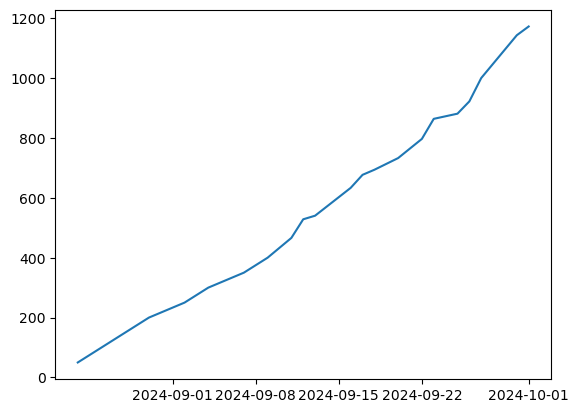

In [11]:
plt.plot(rngra1_irr['Date'], rngra1_irr['Accumulated Irrigation'])

In [12]:
rngra1_biom = full_growth[full_growth['CODE'] == 'RNGRA1']

In [13]:
rngra1_biom

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
18,2024-09-07,19,3,N,RNGRA1,12,12.9,11.1,11.80,35,0.000000
63,2024-09-11,19,3,N,RNGRA1,15,14.2,13.2,12.80,19,0.000000
108,2024-09-14,19,3,N,RNGRA1,13,17.5,15.6,11.80,17,0.000000
153,2024-09-17,19,3,N,RNGRA1,16,20.3,17.3,13.20,19,0.000000
198,2024-09-20,19,3,N,RNGRA1,11,23.1,22.8,9.35,19,0.356667
243,2024-09-24,19,3,N,RNGRA1,13,29.5,26.1,10.65,37,0.306667
288,2024-09-29,19,3,N,RNGRA1,10,25.2,29.1,14.35,19,0.000000
333,2024-10-03,19,3,N,RNGRA1,15,29.1,20.6,11.25,19,0.265000


In [105]:
full_growth['Date'] = pd.to_datetime(full_growth['Date'])
irrigation['Date'] = pd.to_datetime(irrigation['Date'])

# Sort by Date and CODE to ensure correct ordering
merged_df = full_growth.merge(irrigation, on=['Date', 'CODE'], how='left').sort_values(by=['CODE', 'Date'])

In [15]:
import pandas as pd

# Assuming df1 and df2 are the two dataframes
# Combine unique dates from both dataframes
combined_dates = pd.DataFrame({'Date': pd.to_datetime(pd.concat([rngra1_irr['Date'], rngra1_biom['Date']]).unique())})
combined_dates.sort_values('Date', inplace=True)


In [19]:
# Ensure all Date columns are datetime
combined_dates['Date'] = pd.to_datetime(combined_dates['Date'])
rngra1_irr['Date'] = pd.to_datetime(rngra1_irr['Date'])
rngra1_biom['Date'] = pd.to_datetime(rngra1_biom['Date'])

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_60396/2610382319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rngra1_irr['Date'] = pd.to_datetime(rngra1_irr['Date'])
/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_60396/2610382319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rngra1_biom['Date'] = pd.to_datetime(rngra1_biom['Date'])


In [20]:
# Merge with combined dates
merged_df1 = combined_dates.merge(rngra1_irr, on='Date', how='left')
merged_df2 = combined_dates.merge(rngra1_biom, on='Date', how='left')

# Merge the two dataframes
final_merged = pd.merge(merged_df1, merged_df2, on='Date', how='outer')

In [21]:
final_merged.interpolate(method='linear', inplace=True)

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_60396/3786228103.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  final_merged.interpolate(method='linear', inplace=True)


In [22]:
final_merged

,Date,CODE_x,Quantity (mL),Accumulated Irrigation,Number,Line,Sample,CODE_y,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness
0,2024-08-24,RNGRA1,50.000,50.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-26,RNGRA1,50.000,100.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-08-28,RNGRA1,50.000,150.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-30,RNGRA1,50.000,200.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-02,RNGRA1,50.000,250.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-09-04,RNGRA1,50.000,300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-09-07,RNGRA1,50.000,350.000,19.0,3.0,N,RNGRA1,12.000000,12.900000,11.100000,11.800000,35.000000,0.000000
7,2024-09-07,RNGRA1,50.000,350.000,19.0,3.0,N,RNGRA1,12.000000,12.900000,11.100000,11.800000,35.000000,0.000000
8,2024-09-07,RNGRA1,50.000,350.000,19.0,3.0,N,RNGRA1,12.000000,12.900000,11.100000,11.800000,35.000000,0.000000
9,2024-09-07,RNGRA1,50.000,350.000,19.0,3.0,N,RNGRA1,12.000000,12.900000,11.100000,11.800000,35.000000,0.000000


In [111]:
#merged_df['Quantity (mL)'] = merged_df.groupby('CODE')['Quantity (mL)'].ffill().bfill()
#merged_df['Accumulated Irrigation'] = merged_df.groupby('CODE')['Accumulated Irrigation'].ffill().bfill()


In [113]:
merged_df.drop(columns='Accumulate Irrigation', inplace=True)

In [114]:
merged_df[300:345]

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,BBCH,Average Leaf Thickness,Quantity (mL),Accumulated Irrigation
184,2024-09-20,5,1,W,RWGRB3,11,22.9,21.8,7.45,17,0.343333,28.0,726.5
229,2024-09-24,5,1,W,RWGRB3,12,24.6,19.8,8.45,19,0.303333,28.0,726.5
274,2024-09-29,5,1,W,RWGRB3,9,22.4,19.3,8.55,19,0.396667,28.0,726.5
319,2024-10-03,5,1,W,RWGRB3,12,23.5,20.4,9.05,19,0.295000,28.0,726.5
9,2024-09-07,10,2,W,RWGRB4,10,12.5,13.2,14.60,19,0.000000,50.0,350.0
54,2024-09-11,10,2,W,RWGRB4,10,22.1,14.7,15.20,37,0.000000,54.5,454.5
99,2024-09-14,10,2,W,RWGRB4,14,23.6,20.7,12.20,19,0.000000,54.5,454.5
144,2024-09-17,10,2,W,RWGRB4,16,27.1,23.8,14.20,19,0.000000,37.0,683.5
189,2024-09-20,10,2,W,RWGRB4,15,27.2,24.6,9.45,19,0.320000,42.0,754.5
234,2024-09-24,10,2,W,RWGRB4,15,30.4,27.6,10.15,19,0.300000,42.0,754.5
